In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

df = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

X = df.drop('Class label', 1)
y = df['Class label']
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]


In [3]:
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [4]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy (tree): 0.96
Accuracy (tree, sklearn): 0.96


In [5]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='C://Users//POPO//Desktop//tree.dot', 
                feature_names=X.columns.values)

In [23]:
#dot -Tpng tree.dot -o fig-tree.png 視覺化輸出

In [6]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

Accuracy (forest): 0.98


In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
importances

array([0.1020041 , 0.02243885, 0.01132497, 0.03037917, 0.01880012,
       0.04960243, 0.1887356 , 0.01250715, 0.02328329, 0.15461952,
       0.06546964, 0.16244521, 0.15838994])

In [8]:
indices = np.argsort(importances)[::-1]

In [9]:
indices

array([ 6, 11, 12,  9,  0, 10,  5,  3,  8,  1,  4,  7,  2], dtype=int64)

In [10]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30,
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
 3) Proline                        0.158390
 4) Color intensity                0.154620
 5) Alcohol                        0.102004
 6) Hue                            0.065470
 7) Total phenols                  0.049602
 8) Alcalinity of ash              0.030379
 9) Proanthocyanins                0.023283
10) Malic acid                     0.022439
11) Magnesium                      0.018800
12) Nonflavanoid phenols           0.012507
13) Ash                            0.011325


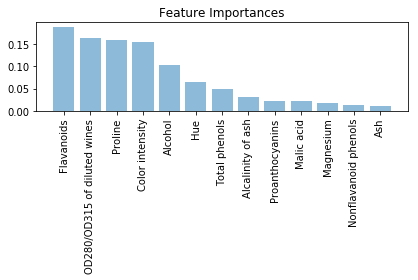

In [11]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()

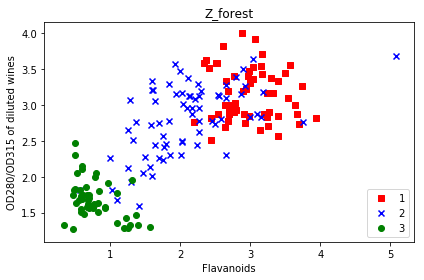

In [12]:
import matplotlib.pyplot as plt

Z_forest = X[['Flavanoids', 'OD280/OD315 of diluted wines']].values

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values==l, 0], 
                Z_forest[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315 of diluted wines')
plt.legend(loc='lower right')
plt.tight_layout()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(data=X, columns=init_data['feature_names'])
y = pd.DataFrame(data=y, columns=['label'])

In [18]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

 1) worst concave points           0.141849
 2) mean concave points            0.117697
 3) worst radius                   0.110919
 4) worst perimeter                0.105243
 5) mean concavity                 0.077163
 6) worst area                     0.073364
 7) area error                     0.041760
 8) mean perimeter                 0.036943
 9) mean radius                    0.035625
10) worst concavity                0.035205
11) mean area                      0.032890
12) worst texture                  0.022736
13) mean texture                   0.018584
14) worst compactness              0.016786
15) radius error                   0.015408
16) worst symmetry                 0.014770
17) worst smoothness               0.014235
18) mean compactness               0.010085
19) perimeter error                0.010040
20) worst fractal dimension        0.009015
21) concave points error           0.008085
22) compactness error              0.007420
23) mean smoothness             

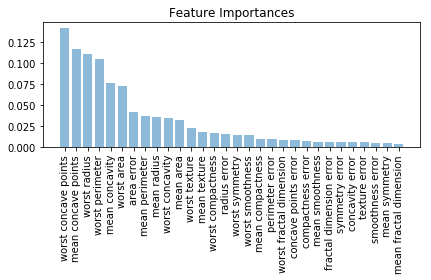

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()

In [21]:
X=X[["worst concave points","mean concave points"]]       

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.89
Accuracy per feature: 0.44
